In [7]:
!rm *.csv *.zip

In [1]:
from google.colab import files
files.upload() # kaggle.jsonをアップロード
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


  0% 0.00/261k [00:00<?, ?B/s]
100% 261k/261k [00:00<00:00, 72.8MB/s]
Archive:  covid19-dataset-in-japan.zip
  inflating: covid_jpn_metadata.csv  
  inflating: covid_jpn_prefecture.csv  
  inflating: covid_jpn_total.csv     
  0% 0.00/871k [00:00<?, ?B/s]
100% 871k/871k [00:00<00:00, 50.5MB/s]
Archive:  uk-covid19-data.zip
  inflating: England_Regions_COVID_Dataset.csv  
  inflating: NEW_Official_Population_Data_ONS_mid-2019.csv  
  inflating: Populations_for_UK_and_Devolved_Nations.csv  
  inflating: UK_Devolved_Nations_COVID_Dataset.csv  
  inflating: UK_Local_Authority_UTLA_COVID_Dataset.csv  
  inflating: UK_National_Total_COVID_Dataset.csv  
Date
2021-04-30 00:00:00+00:00     2330
2021-04-30 00:00:00+00:00     1040
2021-04-30 00:00:00+00:00    22784
2021-04-30 00:00:00+00:00     1604
2021-04-30 00:00:00+00:00     2077
2021-04-30 00:00:00+00:00     4110
2021-04-30 00:00:00+00:00     1855
2021-04-30 00:00:00+00:00     2212
2021-04-30 00:00:00+00:00     2123
2021-04-30 00:00:00+00:00

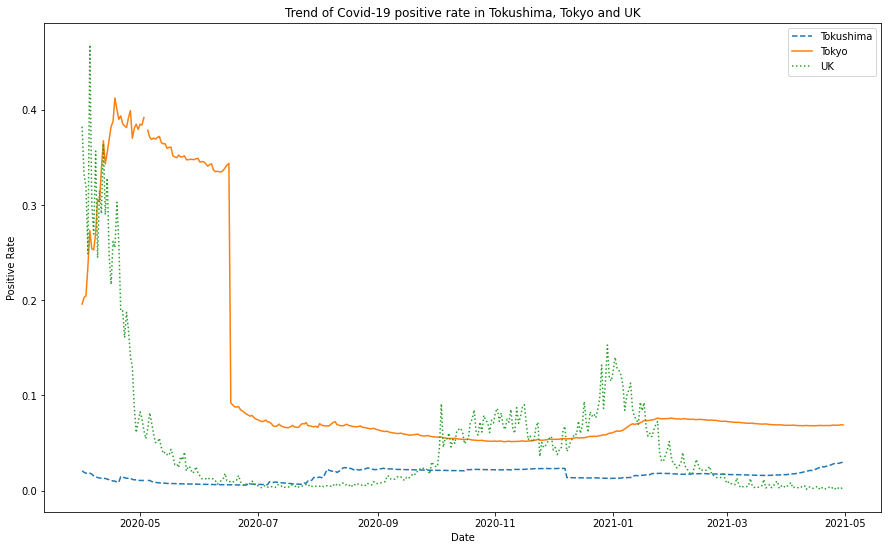

In [8]:
# プログラム2.10

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# データの準備（covid-19の検査に関するデータ）
def prepare():
    # 日本のデータ
    !kaggle datasets download -d lisphilar/covid19-dataset-in-japan
    !unzip covid19-dataset-in-japan.zip
    # 英国のデータ
    !kaggle datasets download -d vascodegama/uk-covid19-data
    !unzip uk-covid19-data.zip

# タイムゾーンの変換および陽性者数の時系列推移の可視化
def dt_convert():
    # 日本のcovid-19の検査数、陽性者数などのデータ
    df = pd.read_csv('covid_jpn_prefecture.csv')
    # Date列をインデックスに指定する
    df.index = pd.DatetimeIndex(df['Date'], name='Date')
    # 2020年4月～2021年5月の期間に絞り込む
    df = df[(df['Date'] >= '2020-04-01') & (df['Date'] < '2021-05-01')]
    # UTCに変換
    df.index = df.index.tz_localize('UTC')
    # 最近の国内の陽性者の人数を表示してみる（UTC）
    print(df['Positive'][-10:])
    # 徳島県のデータを抽出
    kdf = df[df['Prefecture'] == 'Tokushima']
    # 徳島県の陽性率(=陽性者数/検査数)
    positive_Tokushima = pd.DataFrame(kdf['Positive']/kdf['Tested'], columns=['Positive'])
    print(positive_Tokushima)
    plt.figure(figsize=(15,9))
    plt.plot(positive_Tokushima, '--', label='Tokushima') 
    plt.title('Trend of Covid-19 positive rate in Tokushima, Tokyo and UK')
    plt.xlabel('Date')
    plt.ylabel('Positive Rate')

    # 東京都のデータを抽出
    tdf = df[df['Prefecture'] == 'Tokyo']
    # 東京都の陽性率(=陽性者数/検査数)
    positive_Tokyo = pd.DataFrame(
        tdf['Positive']/tdf['Tested'], columns=['Positive'])
    print(positive_Tokyo)
    # グラフ表示
    plt.plot(positive_Tokyo, '-', label='Tokyo') 

    # 英国のcovid-19の検査数、陽性者数などデータを読込み
    df_uk = pd.read_csv('UK_National_Total_COVID_Dataset.csv')
    # 検査数が0になっているデータは除外
    df_uk = df_uk[df_uk['newTestsByPublishDate']>0]
    df_uk.index = pd.DatetimeIndex(df_uk['date'], name='date')
    # タイムゾーンをUTCに変換
    df_uk.index = df_uk.index.tz_localize('UTC')
    # 英国の陽性率(=陽性者数/検査数)
    df_uk['Positive'] = df_uk['newCasesByPublishDate']/df_uk['newTestsByPublishDate']
    positive_uk = pd.DataFrame(df_uk['Positive'], columns=['Positive'])
    # 2020年4月～2021年5月の期間に絞り込む
    positive_uk = positive_uk[(positive_uk.index >= '2020-04-01') & \
                                      (positive_uk.index < '2021-05-01')]
    print(positive_uk)
    # グラフ表示
    plt.plot(positive_uk, ':', label='UK') 
    plt.legend()
    plt.savefig('Tokushima-Tokyo-UK.png', bbox_inches='tight', dpi=300) 
    plt.show()

def main():
    prepare()
    dt_convert()

if __name__ == '__main__':
    main()
    